__Uploading packages__

In [182]:
%pip install scikits-bootstrap --user
%pip install pymicro --user
%pip install vtk --user
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [211]:
from scipy import *
from matplotlib.pyplot import *

import glob,os,sys,csv
import pandas as pd 
from random import shuffle, sample
from numpy.linalg import norm
import statsmodels.nonparametric.smoothers_lowess as loess
from scipy.io import *
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt

__Functions__

In [194]:

def len2(x):
	if type(x) is not type([]):
		if type(x) is not type(array([])):
			return -1
	return len(x)

def circdist(angles1,angles2):
    if len2(angles2) < 0:
        if len2(angles1) > 0:
            angles2 = [angles2]*len(angles1)
        else:
            angles2 = [angles2]
            angles1 = [angles1]
    if len2(angles1) < 0:
        angles1 = [angles1]*len(angles2)
        
    return np.angle(exp(1j*angles1)/exp(1j*angles2))
        
    #return amap(lambda a1,a2: phase2(exp(1j*a1)/exp(1j*a2)), angles1,angles2)


def circ_mean(x):
	return circmean(x,low=-pi,high=pi)

def rem_sys_err(report,target,w):
    n=[]
    for x in arange(-pi,pi,w):
        d=circdist(target,x)
        idx = (d >= x) & (d<x+w)
        report[idx] = circdist(report[idx],circmean(circdist(report[idx],target[idx]),low=-pi,high=pi))
        n.append(sum(idx))
        
    return report,n

def rem_sys_err2(report,target,frac=.25):
    #''' Removes from the response the systematic error of the subject.'''
    fit_resp = loess.lowess(report, target, frac = frac, return_sorted = False)
    fit_error = circdist(fit_resp, target)
    clean_res = circdist(report, fit_error) # Clean response ?
    return clean_res

def compute_serial(report,target,pre_target,xxx,flip=None,ref_report=False):
	report = rem_sys_err2(array(report),array(target))
	err = circdist(report,target)
	d = circdist(pre_target,target) #Previous cue - current cue
	if ref_report:
		d=circdist(report[:-1],target[1:])
	
	# remove outliers
	idx_clean=(abs(err)<3*std((err))) & (abs(err)<1)
	#idx_clean = idx_clean & (report[1:] !=0)
	
	err=err[idx_clean]
	d=d[idx_clean]
	m_err=[]
	std_err=[]
	count=[]
	cis=[]
	if flip:
		err = sign(d)*err
		d=abs(d)
	points_idx=[]
	for t in xxx:
		idx=(d>=t)&(d<=t+w2)
		m_err.append(circ_mean(err[idx]))
		std_err.append(circstd(err[idx])/sqrt(sum(idx)))
		count.append(sum(idx))
		points_idx.append(idx)
	return array(err),d,array(m_err),array(std_err),count,points_idx






	

__Load dataset__

In [195]:
# Change working directory

os.chdir("/Users/leenfarah/Desktop/")

# Import the library of circstats which is used for circular statistics

# from circ_stats import * 					
# from time import time, sleep

In [196]:
# Importing behavioral data from experiment 
# if platform.system() == 'Darwin':
mne_dir = os.path.join('/Users','leenfarah','Desktop','wm_prior') # mac # Path for navigating in the desktop

In [197]:
# Path for the core folder of where the data is within he desktop (mne_dir), nothing about the exact participants yet
data_dir = os.path.join(mne_dir , 'Behavior','Participants')
print(data_dir)

/Users/leenfarah/Desktop/wm_prior/Behavior/Participants


__Loading behavioral data__

In [198]:
file

'leentest_060220231028.csv'

In [199]:
data_dir

'/Users/leenfarah/Desktop/wm_prior/Behavior/Participants'

In [277]:
results_path =  os.path.join(mne_dir) 


print(results_path)
subj_sel = 'leentest_060220231028', 'Leen.csv'

/Users/leenfarah/Desktop/wm_prior


In [278]:
# Tp use later for all the participants
subjs = ['S01', 'S02', 'S03']

for isubj in subjs:
    print(isubj)

S01
S02
S03


In [227]:
p_file

NameError: name 'p_file' is not defined

In [438]:
# The subject to be selected 
subj_sel = 'leentest', 'Leen.csv'

# loading and cocatenating data
os.chdir(data_dir)

bdata = pd.DataFrame([])

# ALL CSV FILES EDIT THIS
# Load any file that is a csv (useful when more participants are in the folder)
for file in glob.glob("*.csv"):
    print(file)
    bdata = bdata.append(pd.read_csv(os.path.join(data_dir, file),sep=';'))
    #dat = pickle.load(p_file)


print(data_dir)

#df = pd.concat([rdata, ddata, odata], axis = 1)

leentest_060220231028.csv
Leen.csv
/Users/leenfarah/Desktop/wm_prior/Behavior/Participants


/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/721652833.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bdata = bdata.append(pd.read_csv(os.path.join(data_dir, file),sep=';'))
/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/721652833.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bdata = bdata.append(pd.read_csv(os.path.join(data_dir, file),sep=';'))


In [439]:
bdata

,subj,trial,block,prior,ct,delay,fixated,keypressed,R,T_Angle,...,MT,ts_b,ts_f,ts_p,ts_d,ts_r,ts_e,m_pos_x,m_pos_y,m_clock
0,leentest,0,0,0,False,1000,1,NaN,10,-32.874462,...,1.815394,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-58.323788, -58.323788, -58.323788, -58.32378...","[-24.480808, -24.480808, -24.480808, -24.48080...","[0.0017055050120688975, 0.0327049600018654, 0...."
1,leentest,1,0,0,False,3000,1,NaN,10,100.001547,...,1.499747,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-54.718082, -54.718082, -54.718082, -54.71808...","[-42.12976, -42.12976, -42.12976, -42.12976, -...","[0.0015341589751187712, 0.01752462997683324, 0..."
2,leentest,2,0,0,False,1000,1,NaN,10,-107.790285,...,1.733003,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-70.722336, -70.722336, -70.722336, -70.72233...","[-34.538815, -34.538815, -34.538815, -34.53881...","[0.0015296380151994526, 0.017657952004810795, ..."
3,leentest,3,0,0,False,3000,1,NaN,10,-18.162286,...,2.265720,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-54.33854, -54.33854, -54.33854, -54.33854, -...","[-26.505062, -26.505062, -26.505062, -26.50506...","[0.0015151689876802266, 0.016510938992723823, ..."
4,leentest,4,0,0,False,1000,1,NaN,10,9.854053,...,3.933997,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-69.64695, -69.64695, -69.64695, -69.64695, -...","[-38.84035, -38.84035, -38.84035, -38.84035, -...","[0.001699480984825641, 0.01661708499887027, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Leen,45,9,[192.98077725],False,1000,1,NaN,10,302.299494,...,1.400266,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-44.343792, -44.343792, -44.343792, -44.34379...","[-28.529314, -28.529314, -28.529314, -28.52931...","[0.0018305809935554862, 0.01702922600088641, 0..."
496,Leen,46,9,[192.98077725],False,3000,1,NaN,10,135.240158,...,1.767859,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-58.450302, -58.450302, -58.450302, -58.45030...","[-24.733839, -24.733839, -24.733839, -24.73383...","[0.0011958259856328368, 0.016467955021653324, ..."
497,Leen,47,9,[192.98077725],False,1000,1,NaN,10,359.187367,...,2.348710,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-52.693832, -52.693832, -52.693832, -52.69383...","[-43.205147, -43.205147, -43.205147, -43.20514...","[0.0018478929996490479, 0.01670226000715047, 0..."
498,Leen,48,9,[192.98077725],False,3000,1,NaN,10,216.134817,...,1.883755,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-50.796093, -50.796093, -50.796093, -50.79609...","[-42.952114, -42.952114, -42.952114, -42.95211...","[0.0018594390130601823, 0.015783348004333675, ..."


In [396]:
df = bdata
df


,subj,trial,block,prior,ct,delay,fixated,keypressed,R,T_Angle,...,MT,ts_b,ts_f,ts_p,ts_d,ts_r,ts_e,m_pos_x,m_pos_y,m_clock
0,leentest,0,0,0,False,1000,1,NaN,10,-32.874462,...,1.815394,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-58.323788, -58.323788, -58.323788, -58.32378...","[-24.480808, -24.480808, -24.480808, -24.48080...","[0.0017055050120688975, 0.0327049600018654, 0...."
1,leentest,1,0,0,False,3000,1,NaN,10,100.001547,...,1.499747,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-54.718082, -54.718082, -54.718082, -54.71808...","[-42.12976, -42.12976, -42.12976, -42.12976, -...","[0.0015341589751187712, 0.01752462997683324, 0..."
2,leentest,2,0,0,False,1000,1,NaN,10,-107.790285,...,1.733003,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-70.722336, -70.722336, -70.722336, -70.72233...","[-34.538815, -34.538815, -34.538815, -34.53881...","[0.0015296380151994526, 0.017657952004810795, ..."
3,leentest,3,0,0,False,3000,1,NaN,10,-18.162286,...,2.265720,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-54.33854, -54.33854, -54.33854, -54.33854, -...","[-26.505062, -26.505062, -26.505062, -26.50506...","[0.0015151689876802266, 0.016510938992723823, ..."
4,leentest,4,0,0,False,1000,1,NaN,10,9.854053,...,3.933997,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-69.64695, -69.64695, -69.64695, -69.64695, -...","[-38.84035, -38.84035, -38.84035, -38.84035, -...","[0.001699480984825641, 0.01661708499887027, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Leen,45,9,[192.98077725],False,1000,1,NaN,10,302.299494,...,1.400266,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-44.343792, -44.343792, -44.343792, -44.34379...","[-28.529314, -28.529314, -28.529314, -28.52931...","[0.0018305809935554862, 0.01702922600088641, 0..."
496,Leen,46,9,[192.98077725],False,3000,1,NaN,10,135.240158,...,1.767859,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-58.450302, -58.450302, -58.450302, -58.45030...","[-24.733839, -24.733839, -24.733839, -24.73383...","[0.0011958259856328368, 0.016467955021653324, ..."
497,Leen,47,9,[192.98077725],False,1000,1,NaN,10,359.187367,...,2.348710,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-52.693832, -52.693832, -52.693832, -52.69383...","[-43.205147, -43.205147, -43.205147, -43.20514...","[0.0018478929996490479, 0.01670226000715047, 0..."
498,Leen,48,9,[192.98077725],False,3000,1,NaN,10,216.134817,...,1.883755,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-50.796093, -50.796093, -50.796093, -50.79609...","[-42.952114, -42.952114, -42.952114, -42.95211...","[0.0018594390130601823, 0.015783348004333675, ..."


In [441]:
df['prior'][495,0]

KeyError: 'key of type tuple not found and not a MultiIndex'

In [399]:
# RECODE VARIABLES

#df['prior'] = df['prior'].astype(int)
df['subj'] = df['subj'].astype('category')
df['prior'] = pd.to_numeric(df['prior'])





ValueError: Unable to parse string "[314.70772558]" at position 100

In [398]:
df

,subj,trial,block,prior,ct,delay,fixated,keypressed,R,T_Angle,...,MT,ts_b,ts_f,ts_p,ts_d,ts_r,ts_e,m_pos_x,m_pos_y,m_clock
0,leentest,0,0,0,False,1000,1,NaN,10,-32.874462,...,1.815394,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-58.323788, -58.323788, -58.323788, -58.32378...","[-24.480808, -24.480808, -24.480808, -24.48080...","[0.0017055050120688975, 0.0327049600018654, 0...."
1,leentest,1,0,0,False,3000,1,NaN,10,100.001547,...,1.499747,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-54.718082, -54.718082, -54.718082, -54.71808...","[-42.12976, -42.12976, -42.12976, -42.12976, -...","[0.0015341589751187712, 0.01752462997683324, 0..."
2,leentest,2,0,0,False,1000,1,NaN,10,-107.790285,...,1.733003,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-70.722336, -70.722336, -70.722336, -70.72233...","[-34.538815, -34.538815, -34.538815, -34.53881...","[0.0015296380151994526, 0.017657952004810795, ..."
3,leentest,3,0,0,False,3000,1,NaN,10,-18.162286,...,2.265720,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-54.33854, -54.33854, -54.33854, -54.33854, -...","[-26.505062, -26.505062, -26.505062, -26.50506...","[0.0015151689876802266, 0.016510938992723823, ..."
4,leentest,4,0,0,False,1000,1,NaN,10,9.854053,...,3.933997,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-69.64695, -69.64695, -69.64695, -69.64695, -...","[-38.84035, -38.84035, -38.84035, -38.84035, -...","[0.001699480984825641, 0.01661708499887027, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Leen,45,9,[192.98077725],False,1000,1,NaN,10,302.299494,...,1.400266,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-44.343792, -44.343792, -44.343792, -44.34379...","[-28.529314, -28.529314, -28.529314, -28.52931...","[0.0018305809935554862, 0.01702922600088641, 0..."
496,Leen,46,9,[192.98077725],False,3000,1,NaN,10,135.240158,...,1.767859,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-58.450302, -58.450302, -58.450302, -58.45030...","[-24.733839, -24.733839, -24.733839, -24.73383...","[0.0011958259856328368, 0.016467955021653324, ..."
497,Leen,47,9,[192.98077725],False,1000,1,NaN,10,359.187367,...,2.348710,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-52.693832, -52.693832, -52.693832, -52.69383...","[-43.205147, -43.205147, -43.205147, -43.20514...","[0.0018478929996490479, 0.01670226000715047, 0..."
498,Leen,48,9,[192.98077725],False,3000,1,NaN,10,216.134817,...,1.883755,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-50.796093, -50.796093, -50.796093, -50.79609...","[-42.952114, -42.952114, -42.952114, -42.95211...","[0.0018594390130601823, 0.015783348004333675, ..."


In [283]:
try:
	df['TMS_trial'] = df['ct'] # New version won't fail
except:
	df['ct'] = df['TMS_Trial'] 	# Old version needs to have this.
	df['recorded']=df['trial']
	df['preT'] = roll(df['T_Angle'],1)
	df['preT'][0] = nan


In [284]:
df.T_Angle

0      -32.874462
1      100.001547
2     -107.790285
3      -18.162286
4        9.854053
          ...    
495    302.299494
496    135.240158
497    359.187367
498    216.134817
499     17.277706
Name: T_Angle, Length: 1000, dtype: float64

In [375]:
df.dtypes
# recode subject as category 
# recode prior as integer

subj                category
trial                  int64
block                  int64
prior                float64
ct                      bool
delay                  int64
fixated                int64
keypressed            object
R                      int64
T_Angle              float64
stim_sd               object
choice_x             float64
choice_y             float64
init_resp_angle       object
choiceAngle          float64
choiceR              float64
RT                   float64
MT                   float64
ts_b                 float64
ts_f                 float64
ts_p                 float64
ts_d                 float64
ts_r                 float64
ts_e                 float64
m_pos_x               object
m_pos_y               object
m_clock               object
TMS_trial               bool
TAngleCorr           float64
choiceAngle_corr     float64
dtype: object

In [209]:
df.columns

Index(['subj', 'trial', 'block', 'prior', 'ct', 'delay', 'fixated',
       'keypressed', 'R', 'T_Angle', 'stim_sd', 'choice_x', 'choice_y',
       'init_resp_angle', 'choiceAngle', 'choiceR', 'RT', 'MT', 'ts_b', 'ts_f',
       'ts_p', 'ts_d', 'ts_r', 'ts_e', 'm_pos_x', 'm_pos_y', 'm_clock',
       'TMS_trial'],
      dtype='object')

In [413]:
df['T_Angle']

0      -32.874462
1      100.001547
2     -107.790285
3      -18.162286
4        9.854053
          ...    
495    302.299494
496    135.240158
497    359.187367
498    216.134817
499     17.277706
Name: T_Angle, Length: 1000, dtype: float64

In [415]:
# Correct T_Angle so that the values that are greater than 180 need to subtract 360 
# In this code, we first define a function subtract_360 that takes a value val as input. If val is greater than 180, it subtracts 360 from val, otherwise it returns val unchanged.
# Next, we create a new column TAngleCorr in the DataFrame df by applying the function subtract_360 to each value in the column T_Angle.


def subtract_360(val):
    if val > 180:
        return val - 360
    return val

df['TAngleCorr'] = df['T_Angle'].apply(subtract_360)
#df['TAngleCorr'] = df['T_Angle']>180 - 360

In [431]:
x = df['prior']

In [443]:
df['prior']

,subj,trial,block,prior,ct,delay,fixated,keypressed,R,T_Angle,...,ts_b,ts_f,ts_p,ts_d,ts_r,ts_e,m_pos_x,m_pos_y,m_clock,TAngleCorr
0,leentest,0,0,0,False,1000,1,NaN,10,-32.874462,...,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-58.323788, -58.323788, -58.323788, -58.32378...","[-24.480808, -24.480808, -24.480808, -24.48080...","[0.0017055050120688975, 0.0327049600018654, 0....",-32.874462
1,leentest,1,0,0,False,3000,1,NaN,10,100.001547,...,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-54.718082, -54.718082, -54.718082, -54.71808...","[-42.12976, -42.12976, -42.12976, -42.12976, -...","[0.0015341589751187712, 0.01752462997683324, 0...",100.001547
2,leentest,2,0,0,False,1000,1,NaN,10,-107.790285,...,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-70.722336, -70.722336, -70.722336, -70.72233...","[-34.538815, -34.538815, -34.538815, -34.53881...","[0.0015296380151994526, 0.017657952004810795, ...",-107.790285
3,leentest,3,0,0,False,3000,1,NaN,10,-18.162286,...,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-54.33854, -54.33854, -54.33854, -54.33854, -...","[-26.505062, -26.505062, -26.505062, -26.50506...","[0.0015151689876802266, 0.016510938992723823, ...",-18.162286
4,leentest,4,0,0,False,1000,1,NaN,10,9.854053,...,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,1.675676e+09,"[-69.64695, -69.64695, -69.64695, -69.64695, -...","[-38.84035, -38.84035, -38.84035, -38.84035, -...","[0.001699480984825641, 0.01661708499887027, 0....",9.854053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Leen,45,9,[,False,1000,1,NaN,10,302.299494,...,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-44.343792, -44.343792, -44.343792, -44.34379...","[-28.529314, -28.529314, -28.529314, -28.52931...","[0.0018305809935554862, 0.01702922600088641, 0...",-57.700506
496,Leen,46,9,[,False,3000,1,NaN,10,135.240158,...,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-58.450302, -58.450302, -58.450302, -58.45030...","[-24.733839, -24.733839, -24.733839, -24.73383...","[0.0011958259856328368, 0.016467955021653324, ...",135.240158
497,Leen,47,9,[,False,1000,1,NaN,10,359.187367,...,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-52.693832, -52.693832, -52.693832, -52.69383...","[-43.205147, -43.205147, -43.205147, -43.20514...","[0.0018478929996490479, 0.01670226000715047, 0...",-0.812633
498,Leen,48,9,[,False,3000,1,NaN,10,216.134817,...,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,1.675371e+09,"[-50.796093, -50.796093, -50.796093, -50.79609...","[-42.952114, -42.952114, -42.952114, -42.95211...","[0.0018594390130601823, 0.015783348004333675, ...",-143.865183


In [436]:
df['prior'] = [x[0] for x in df['prior']]
# calculate the intecular mean of the blocks including the prior


In [416]:
df['TAngleCorr']

0      -32.874462
1      100.001547
2     -107.790285
3      -18.162286
4        9.854053
          ...    
495    -57.700506
496    135.240158
497     -0.812633
498   -143.865183
499     17.277706
Name: TAngleCorr, Length: 1000, dtype: float64

# To find the error, we need to
df.loc[df['choiceAngleCorr'] > 180,   -360] 

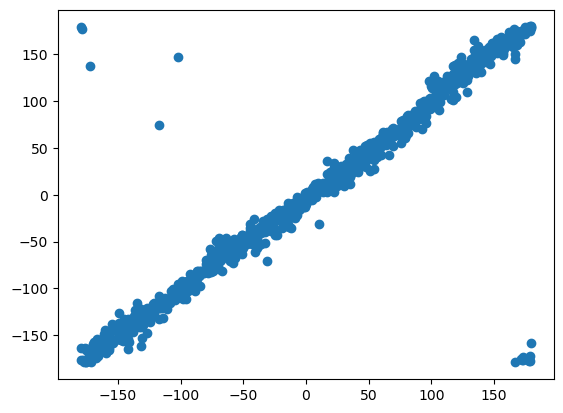

In [417]:
# x axis is T_Angle, y axis is 'choiceAngle'
plt.scatter(df['TAngleCorr'], df['choiceAngle'])

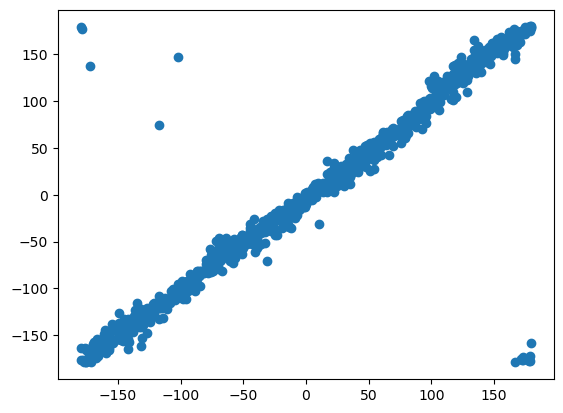

In [418]:
# x axis is T_Angle, y axis is 'choiceAngle'
plt.scatter(df['TAngleCorr'], df['choiceAngle'])

/opt/anaconda3/envs/wm_exp/lib/python3.8/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


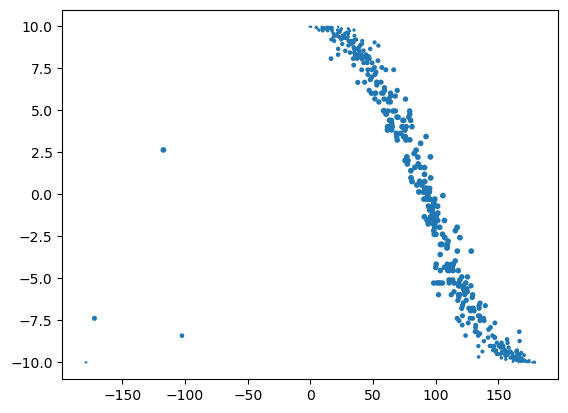

In [419]:
# plot 3D, x axis is 'T_Angle', y axis is 'choice_x', z axis is 'choice_y'
plt.scatter(df['TAngleCorr'], df['choice_x'], df['choice_y'])

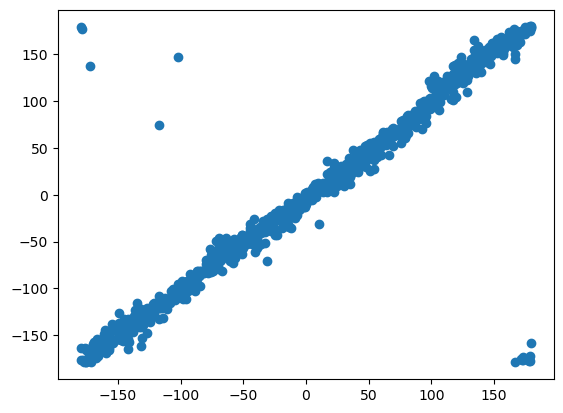

In [420]:
# x axis is T_Angle, y axis is 'choiceAngle'
plt.scatter(df['TAngleCorr'], df['choiceAngle'])

In [421]:
df.prior == 0

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: prior, Length: 1000, dtype: bool

In [422]:
df.prior

0                   0
1                   0
2                   0
3                   0
4                   0
            ...      
495    [192.98077725]
496    [192.98077725]
497    [192.98077725]
498    [192.98077725]
499    [192.98077725]
Name: prior, Length: 1000, dtype: object

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

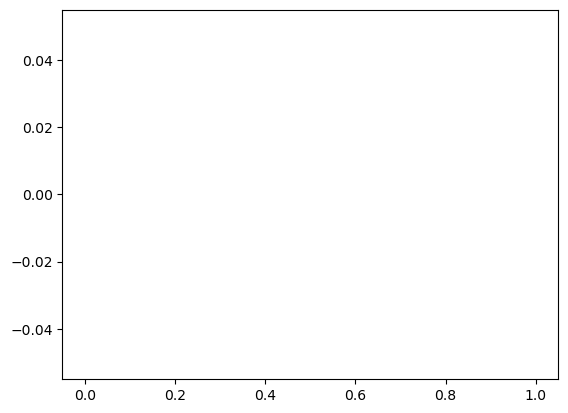

In [424]:
plt.hist(df[(df.subj == 'Leen')& (df.prior == 0)].TAngleCorr,50, alpha=0.5)

(array([[21., 32., 21., 13., 22., 25., 21., 15., 22., 12., 22., 18., 17.,
         14., 23., 21., 21., 19., 17., 18., 21., 23., 15., 14., 21., 19.,
         18., 19., 20., 24., 20., 16., 16., 23., 16., 19., 15., 21., 34.,
         21., 19., 27., 21., 22., 12., 17., 25., 22., 25., 21.],
        [24., 24., 23., 25., 16., 26., 17., 13., 18., 19., 19., 13., 10.,
         17., 15., 16., 24., 22., 22., 16., 22., 23., 14., 20., 16., 17.,
         21., 18., 19., 21., 20., 11., 19., 17., 21.,  9., 12., 18., 20.,
         15., 10., 24., 20., 17., 16., 14., 22., 30., 21., 20.]]),
 array([-1.79852770e+02, -1.72659515e+02, -1.65466260e+02, -1.58273004e+02,
        -1.51079749e+02, -1.43886493e+02, -1.36693238e+02, -1.29499982e+02,
        -1.22306727e+02, -1.15113472e+02, -1.07920216e+02, -1.00726961e+02,
        -9.35337055e+01, -8.63404501e+01, -7.91471946e+01, -7.19539392e+01,
        -6.47606838e+01, -5.75674284e+01, -5.03741730e+01, -4.31809176e+01,
        -3.59876622e+01, -2.87944068e+01, -2

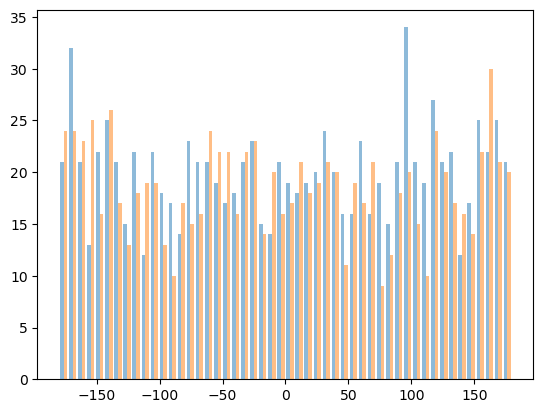

In [425]:
# plt.hist 
#fit in the variable T angle

#plt.hist(df['TAngleCorr'])
plt.hist(((df.TAngleCorr), (df.choiceAngle)),50, alpha=0.5)

#plt.grid(axis='y')
#plt.xlabel('TAngleCorr')
#plt.ylabel('Frequency')
#plt.title('Histogram of TAngleCorr')
#plt.show()

In [215]:
pip install pymicro


Note: you may need to restart the kernel to use updated packages.


In [295]:
df.T_Angle[1]

1    100.001547
1    -34.676601
Name: T_Angle, dtype: float64

In [294]:
df.T_Angle[0]

0    -32.874462
0   -113.216174
Name: T_Angle, dtype: float64

In [317]:
from pymicro.view.vol_utils import compute_affine_transform
# compute the affine transform from the point set

radius = np.sqrt(np.mean(df.choice_x**2+df.choice_y**2))
ref_points = np.array([[radius*np.cos(np.deg2rad(df.T_Angle[i])), radius*np.sin(np.deg2rad(df.T_Angle[i]))] for i in range(len(df))])

KeyError: 500

In [344]:
from pymicro.view.vol_utils import compute_affine_transform
# compute the affine transform from the point set

radius = np.sqrt(np.mean(df.choice_x**2+df.choice_y**2)) # radisu by finding the sum fo squared oof choice x and choice y, then finding the mean and squarerootign it for the radius
ref_points = np.array([[radius*np.cos(np.deg2rad(df.TAngleCorr)), radius*np.sin(np.deg2rad(df.TAngleCorr))] for i in range(len(df))]) # used to find the reference point on the circle
tsr_points = np.array([[df.choice_x, df.choice_y] for j in range(len(df))]) # adds the value of the "choice_x" column to the x coordinate of the point, and the value of the "choice_y" column to the y coordinate of the point, target points
#translation, transformation = compute_affine_transform(ref_points, tsr_points) #translation = vector, transformation = matrix, this is used to map ref_points ontto tsr_points
ref_centroid = np.mean(ref_points, axis=0) # used foor distance of reference point form the 0th axis, mean of each column is computed = row of mean x and mean y of the ref_points
tsr_centroid = np.mean(tsr_points, axis=0) # mean of each column is computed = row of mean x and mean y of tthe tsr_points
new_points = np.empty_like(ref_points)
for j in range(len(df)):
    new_points[j] = ref_centroid + np.dot(transformation, tsr_points[j] - tsr_centroid) #the resulting new_points array contains the transformed coordinates of the points in the tsr_points array, relative to the ref_points array

# translate and trranform 

In [350]:
shape(tsr_points)

/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/1113712859.py:1: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  shape(tsr_points)


(1000, 2, 1000)

In [349]:
#compute_affine_transform(ref_points,tsr_points)
shape(ref_points)


/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/653483985.py:2: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  shape(ref_points)


(1000, 2, 1000)

In [309]:
from pymicro.view.vol_utils import compute_affine_transform
# compute the affine transform from the point set

radius = np.sqrt(np.mean(df.choice_x**2+df.choice_y**2))
ref_points = np.array([[radius*np.cos(np.deg2rad(df.T_Angle[i])), radius*np.sin(np.deg2rad(df.T_Angle[i]))] for i in range(len(df))])
tsr_points = np.array([[df.choice_x[j], df.choice_y[j]] for j in range(len(df))])
translation, transformation = compute_affine_transform(ref_points, tsr_points)
ref_centroid = np.mean(ref_points, axis=0)
tsr_centroid = np.mean(tsr_points, axis=0)
new_points = np.empty_like(ref_points)
for j in range(len(df)):
    new_points[j] = ref_centroid + np.dot(transformation, tsr_points[j] - tsr_centroid)

#It creates a new column in the pandas dataframe "df" called "choiceAngle_corr".
#It uses the numpy library function np.arctan2 to calculate the inverse tangent of the ratio of the elements in the second column (new_points[:,1]) and the first column (new_points[:,0]) of the 2D array "new_points".
#The result of the arctan2 calculation is then converted from radians to degrees using the numpy function np.rad2deg.
#The final result is stored in the newly created "choiceAngle_corr" column in the "df" dataframe.

#df['choiceAngle_corr'] = np.rad2deg(np.arctan2(new_points[:,1], new_points[:,0])) # original
#df['choiceAngle_corr'] = np.rad2deg(np.arctan2(new_points[:,1], new_points[:,0]))
# CHANGE THE FORMULA FOR CHOICE ANGLE CORR?

KeyError: 500

In [271]:
translation, transformation = compute_affine_transform(ref_points, tsr_points)

In [308]:
df.choiceAngle_corr

0      140.964844
1      -25.758057
2     -159.786621
3      124.026367
4       76.983154
          ...    
495    154.204590
496    -55.936768
497     98.655273
498   -116.368408
499     78.092041
Name: choiceAngle_corr, Length: 1000, dtype: float64

In [306]:
hist(circdist(np.deg2rad(df.choiceAngle_corr), np.deg2rad(df.TAngleCorr)),50, alpha=0.5)
#hist(circdist(np.deg2rad(df.choiceAngle.values), np.deg2rad(df.T_Angle.values)),50, alpha=.5); # original

/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/1778351931.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  if type(x) is not type(array([])):


TypeError: can't multiply sequence by non-int of type 'complex'

In [258]:
# PARAMETERS

w1=pi/50
w2=pi/2
xxx=arange(-pi,pi-w2+w1,w1)
flip = False


/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/4077934751.py:5: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  xxx=arange(-pi,pi-w2+w1,w1)


In [261]:
# EDITING
#sns.set_context('poster') # edited 
T = radians(array(df['TAngleCorr']))
R = radians(array(df['choiceAngle']))
#P = radians(array(df['preT']))
#TMS = array(df['TMS_trial'])

# ORIGINAL
#sns.set_context('poster')
T = radians(array(df['T_Angle']))
R = radians(array(df['choiceAngle_corr']))
P = radians(array(df['preT']))
TMS = array(df['TMS_trial'])

/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/2931994255.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  T = radians(array(df['TAngleCorr']))
/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/2931994255.py:2: DeprecationWarning: scipy.radians is deprecated and will be removed in SciPy 2.0.0, use numpy.radians instead
  T = radians(array(df['TAngleCorr']))
/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/2931994255.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  R = radians(array(df['choiceAngle']))
/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/2931994255.py:3: DeprecationWarning: scipy.radians is deprecated and will be removed in SciPy 2.0.0, use numpy.radians instead
  R = radians(array(df['choiceAngle']))


In [263]:
# EDITING
figure(figsize=[3,2])
xxx=arange(-pi,pi-w2+w1,w1)
flip = False
#%%
#figure(figsize=(10,8))
#err,d,m_err,std_err,count,points_idx = compute_serial(R,T,P,xxx,flip,False)
err,d,m_err,std_err,count,points_idx = compute_serial(R,T,P,xxx,flip,False)

m_err=rad2deg(m_err)
std_err=rad2deg(std_err)

plot(rad2deg(xxx+w2/2),m_err,linewidth=1.5)
fill_between(rad2deg(xxx+w2/2), m_err + std_err, m_err - std_err,alpha=.2)
#errorbar(xxx+w2/2,m_err,std_err)
plot(rad2deg(xxx+w2/2),zeros(len(xxx)),"k--",linewidth=1)

xlabel(r'$\theta_{n-1}^S - \theta_n^S$ ($^o$)', fontsize=14); ylabel(r'$\theta_n^e$ ($^o$)', fontsize=14);
sns.despine()
savefig('serialbias_S1.svg')

adict={}
adict['m_err']=m_err
adict['std_err']=std_err
adict['xxx']=xxx
adict['w2']=w2
from scipy.io import savemat
savemat('../serialbias_S1.mat',adict)

/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/1215331369.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  xxx=arange(-pi,pi-w2+w1,w1)
/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/1778351931.py:43: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  report = rem_sys_err2(array(report),array(target))
/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/1778351931.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  if type(x) is not type(array([])):
/var/folders/r9/cr9dfv5j4v9ghnsqpsk0syy40000gn/T/ipykernel_10621/1778351931.py:17: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return np.angle(exp(1j*angles1)/exp(1j*angles2))


ValueError: operands could not be broadcast together with shapes (76,) (500,) 

<Figure size 300x200 with 0 Axes>

In [ ]:
# ORIGINAL
figure(figsize=[3,2])
xxx=arange(-pi,pi-w2+w1,w1)
flip = False
#%%
#figure(figsize=(10,8))
#err,d,m_err,std_err,count,points_idx = compute_serial(R,T,xxx,flip,False)
err,d,m_err,std_err,count,points_idx = compute_serial(R,T,P,xxx,flip,False)

m_err=rad2deg(m_err)
std_err=rad2deg(std_err)

plot(rad2deg(xxx+w2/2),m_err,linewidth=1.5)
fill_between(rad2deg(xxx+w2/2), m_err + std_err, m_err - std_err,alpha=.2)
#errorbar(xxx+w2/2,m_err,std_err)
plot(rad2deg(xxx+w2/2),zeros(len(xxx)),"k--",linewidth=1)

xlabel(r'$\theta_{n-1}^S - \theta_n^S$ ($^o$)', fontsize=14); ylabel(r'$\theta_n^e$ ($^o$)', fontsize=14);
sns.despine()
savefig('serialbias_S1.svg')

adict={}
adict['m_err']=m_err
adict['std_err']=std_err
adict['xxx']=xxx
adict['w2']=w2
from scipy.io import savemat
savemat('../serialbias_S1.mat',adict)